### Step - 1
**Import the required packages**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

- Data1 : here we will take the data which follows normal ditribution
- Data2 : based on above data we will create a another data by multiplying some value
- so that both sets have multicollinearity
- the both datasets have some covariance
- then we will apply PCA
- will create two new PCs and will check the covariance matrix again
- so the PCs covariance should be zero 

### Step - 2
Create the data

In [20]:
x=np.random.normal(200,10,500)  # mean=200, std=10, no. of observations=500
x.mean()

200.25303662966763

(array([  8.,  16.,  56., 103., 142., 108.,  50.,  15.,   1.,   1.]),
 array([169.15753943, 176.17456401, 183.19158859, 190.20861316,
        197.22563774, 204.24266231, 211.25968689, 218.27671147,
        225.29373604, 232.31076062, 239.3277852 ]),
 <BarContainer object of 10 artists>)

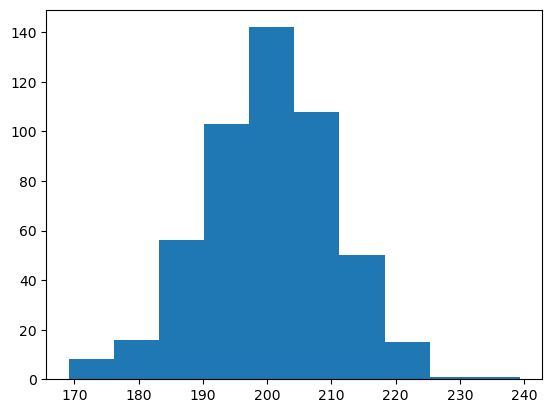

In [21]:
plt.hist(x)

### Step - 3
find covariance and relation 

In [23]:
# create the data y, should be correlate to X
y=0.5*x+np.random.normal(10,5,500)
print("mean: ",y.mean())
print("std: ",y.std())

mean:  110.23043086349224
std:  7.051387208168344


(array([  3.,  15.,  51., 114., 150., 107.,  35.,  22.,   2.,   1.]),
 array([ 87.48506408,  92.55500485,  97.62494562, 102.69488639,
        107.76482716, 112.83476793, 117.9047087 , 122.97464946,
        128.04459023, 133.114531  , 138.18447177]),
 <BarContainer object of 10 artists>)

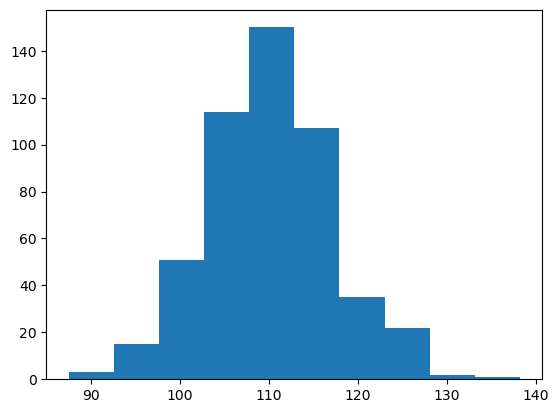

In [24]:
plt.hist(y)

### Step - 4

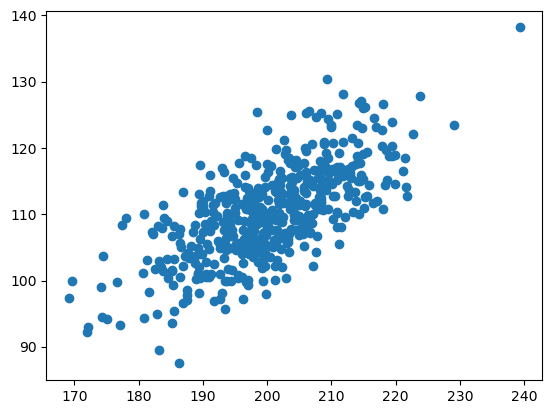

In [26]:
plt.scatter(x,y)

In [27]:
covariance=np.cov(x,y)

In [28]:
covariance

array([[102.88676954,  49.22735973],
       [ 49.22735973,  49.82170497]])

### Observations 
- both points are correlated each other 
- both points are not orthogonal to each other 
- perform covariance matrix for better idea 

<Axes: >

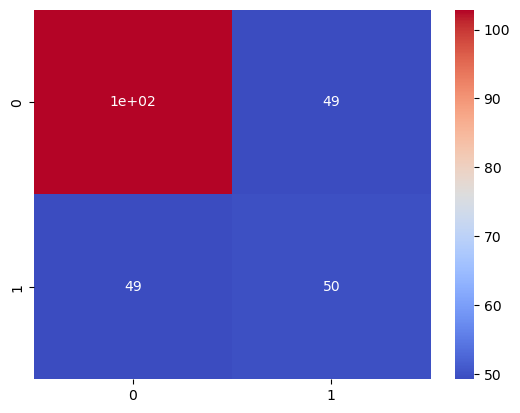

In [30]:
import seaborn as sns 
sns.heatmap(covariance,annot=True,cmap='coolwarm')

### step - 5 
**Perform the PCA**
- to reduce the dimensions
- to avoid multticollinearity
- to make data has orthogonal 

**will calculate eigen values and eigen vectors**

In [33]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(covariance)

In [34]:
eig_values

array([132.27657819,  20.43189632])

In [35]:
eig_vectors

array([[ 0.858619  , -0.51261429],
       [ 0.51261429,  0.858619  ]])

In [36]:
eig_vectors[0]
eig_vectors[1]
np.dot(eig_vectors[0],eig_vectors[1])

0.0

In [37]:
print("Variance percentage :",(120.71880742/(120.71880742 + 18.45253965))*100)
print("Variance percentage :",(18.45253965/(120.71880742 + 18.45253965))*100)

Variance percentage : 86.74113598920704
Variance percentage : 13.258864010792964


- Step - 1 : X data has 500m obs
- Step - 2 : Y data -> based on X , both having correlation
- Step - 3 : plt.scatter
- Step - 4 : covariance matrix
- Step - 5 : np.linalg.eig
- Step - 6 : eigen values and eigen vectors
- Step - 7 : Check Point - 1
  - pc1=ev1 & pc2=ev2
  - independent of each other
  - np.dot(ev1,ev2) = 0
- Step - 8 : var(pc1)=ev1 & var(pc2)=ev2
    - var(pc1)>>>var(pc2)

**Create a new PC's data**

In [61]:
print(x[:5])
print(y[:5])

[212.57271471 189.18576062 215.17684931 183.75465257 190.30965427]
[112.7976202  101.00767588 112.64567785 111.34435603 110.31422844]


**Create a data points from two different raw data(x and y)**

In [67]:
np.vstack([x,y]).T[:5]

array([[212.57271471, 112.7976202 ],
       [189.18576062, 101.00767588],
       [215.17684931, 112.64567785],
       [183.75465257, 111.34435603],
       [190.30965427, 110.31422844]])

In [71]:
# dot product of old data and eigen vectors
z=np.vstack([x,y]).T
new_data=np.dot(z,eig_vectors)
new_data_df=pd.DataFrame(new_data,columns=['pc1','pc2'])
new_data_df.head(5)

,pc1,pc2
0,240.340644,-12.117632
1,214.216467,-10.252215
2,242.498716,-13.583009
3,214.851944,1.407119
4,219.952135,-2.837556


In [77]:
np.cov(new_data_df['pc1'],new_data_df['pc2'])

array([[1.32276578e+02, 5.92356269e-15],
       [5.92356269e-15, 2.04318963e+01]])

In [97]:
PC1=new_data_df['pc1']
PC2=new_data_df['pc2']

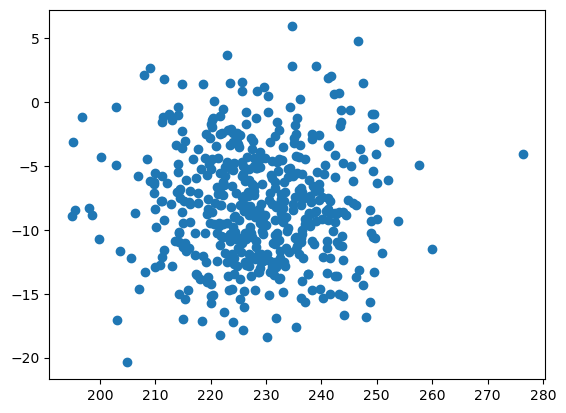

In [99]:
plt.scatter(PC1,PC2)

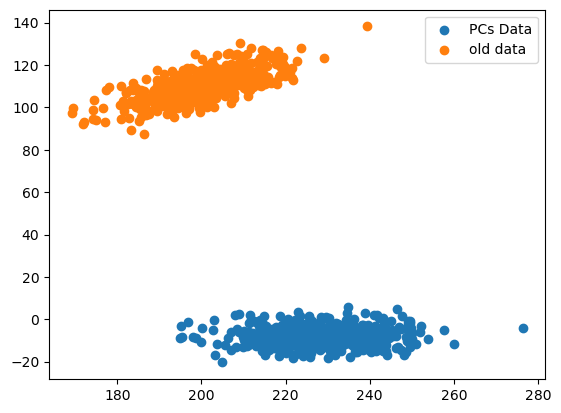

In [107]:
plt.scatter(PC1,PC2,label='PCs Data')
plt.scatter(x,y,label='old data')
plt.legend()
plt.show()

### Using Packages

In [110]:
path=r"C:\Users\Hp\Documents\NareshIT\Data_Files\winequality_red.csv"

In [112]:
df=pd.read_csv(path)

In [138]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [126]:
X=df.drop('quality',axis=1)

In [130]:
y=df['quality']

In [132]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [134]:
pca.explained_variance_ratio_

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

In [136]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.946577
1,0.048368
2,0.002589
3,0.001519
4,0.000874
5,0.000035


In [144]:
pca_data=pca.transform(X)
len(pca_data[0]),len(pca_data)

(6, 1599)

In [146]:
new_data=pd.DataFrame(pca_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
new_data

,pc1,pc2,pc3,pc4,pc5,pc6
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,0.301325
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,0.205114
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,-0.089092
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018
...,...,...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109,-0.200974,0.058238
1595,9.489984,21.627525,-1.986558,-0.027199,0.443711,-0.040335
1596,-3.431354,14.271243,-1.750719,0.174652,0.236271,-0.089513
1597,1.132878,16.316167,-2.134414,-0.235388,-0.519028,-0.015548
